In [ ]:
import numpy as np
from sklearn.datasets import load_iris

n_classes = 3  # Number of classes

X, y = load_iris(return_X_y = True)
n = X.shape[0]
X = X[:,:2]
X = X - np.mean(X, axis=0)  # Center the data


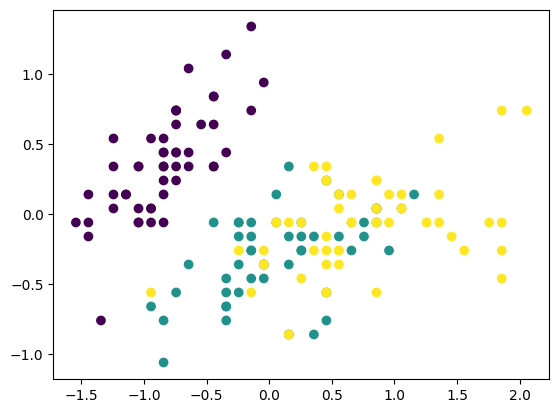

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
X, y = load_iris(return_X_y = True)
n = X.shape[0]
X = X[:,:2]
X = X - np.mean(X, axis=0)  # Center the data





W1, b1, W2, b2 = init_params_numpy(input_dim, hidden_dim, output_dim)

theta = {
    "W1": W1,
    "b1": b1,
    "W2": W2,
    "b2": b2
}


In [ ]:

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return 1.0*(z > 0)


In [ ]:
def forward(X,theta):
    # print(theta)
    W1, b1, W2, b2 = theta["W1"], theta["b1"], theta["W2"], theta["b2"]
    h = relu(np.dot(X, W1) + b1)
    z = np.dot(h, W2) + b2
    return h,z



In [ ]:
def plot_decision_boundary(params, X, y, ax=None):
    if ax is None:
        ax = plt.gca()

    # Create a grid over the input feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Flatten the grid arrays and stack them to form the input data points
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Perform forward pass and compute predicted labels
    logits = forward( grid_points, params)
    predictions = np.argmax(logits[1], axis=1).reshape(xx.shape)

    ax.contourf(xx, yy, predictions, cmap='coolwarm', alpha=0.3)

    scatter = ax.scatter(X[:, 0], X[:, 1], c=np.argmax(y, axis=1), cmap='coolwarm', edgecolor='k')


    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    plt.show()


In [ ]:
def compute_gradients(X,y,theta):
    dJdW1 = np.zeros_like(W1)
    dJdb1 = np.zeros_like(b1)
    dJdW2 = np.zeros_like(W2)
    dJdb2 = np.zeros_like(b2)
    for i in range(n):
        h, z = forward(X, theta)
        p = # your code here
        loss_der = # your code here
        dJdW1 += # your code here
        dJdb1 += # your code here
        dJdW2 += # your code here
        dJdb2 += # your code here
    dJdW1 /=n
    dJdb1 /=n
    dJdW2 /=n
    dJdb2 /=n

    gradients = {
        "W1": dJdW1,
        "b1": dJdb1,
        "W2": dJdW2,
        "b2": dJdb2
    }

    return gradients

In [ ]:

theta_list = [theta]
step_size = 0.01
for i in range(1000):
    theta = theta_list[-1]
    theta_grad = compute_gradients(X,y,theta)
    theta['W1'] -= step_size*theta_grad['W1']
    theta['b1'] -= step_size*theta_grad['b1']
    theta['W2'] -= step_size*theta_grad['W2']
    theta['b2'] -= step_size*theta_grad['b2']
    theta_list.append(theta)

In [ ]:
theta

{'W1': array([[ 1.56825523,  1.21287965,  0.12589107,  2.29092967,  1.70222128,
         -0.97185545,  0.95983135, -0.16031649, -0.19074663,  0.53203727],
        [ 0.13554994,  0.87790439,  1.2658875 ,  0.12677618, -1.00973957,
          0.33375625,  1.23004866, -0.14935046,  0.48718567, -0.20337268]]),
 'b1': array([-2.65848418,  0.42465993,  0.95975142, -0.65275684,  1.83259083,
        -1.45791858, -0.33242027, -0.2253586 ,  1.54106802,  1.65745646]),
 'W2': array([[ 0.15493257,  0.33516666, -0.84477502],
        [-1.58686649, -1.03398488,  0.44849172],
        [ 1.7699379 ,  0.44972022, -0.17431441],
        [-0.3163862 , -1.54396042, -0.91052704],
        [-1.96108785,  1.10985636,  0.58608452],
        [-0.43773541, -1.25295696,  0.77731306],
        [-1.41604695, -0.62230064, -0.6837571 ],
        [ 0.3831205 , -0.5029599 , -1.18469542],
        [ 0.58516678,  0.07225992, -0.19075983],
        [ 0.22628405, -0.74980899, -0.17106643]]),
 'b2': array([-0.43452249, -0.49560623, -0

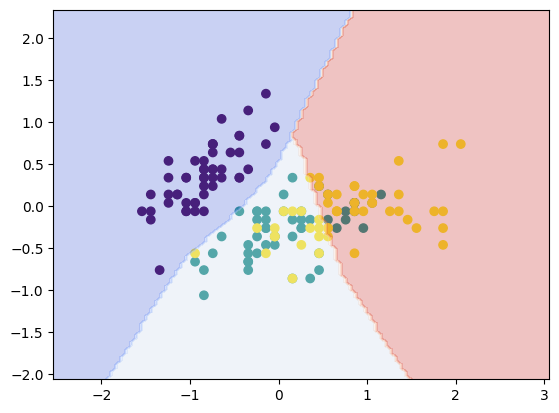

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))

# Flatten the grid arrays and stack them to form the input data points
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Perform forward pass and compute predicted labels
logits = forward( grid_points, theta_list[-1])[1]
predictions = np.argmax(logits, axis=1).reshape(xx.shape)



plt.scatter(X[:,0], X[:,1], c=y)

plt.gca().contourf(xx, yy, predictions, cmap='coolwarm', alpha=0.3)

In [ ]:
logits[1].shape

(10000, 3)